In [16]:
import numpy as np
data = np.genfromtxt("data_TRIM_energy_angle.csv", delimiter=";", names=True)

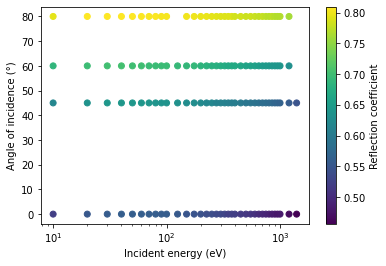

In [17]:
import matplotlib.pyplot as plt

plt.scatter(data["Incident_energy"], data["theta_inc"], c=data["Reflection_coeff"])
plt.xlabel("Incident energy (eV)")
plt.ylabel("Angle of incidence (°)")
plt.xscale("log")
plt.colorbar(label="Reflection coefficient")

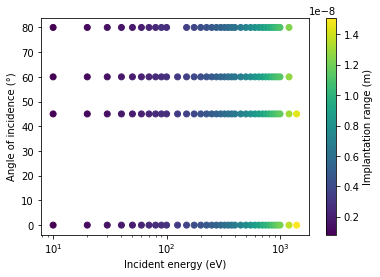

In [20]:
plt.scatter(data["Incident_energy"], data["theta_inc"], c=data["Implantation_range"])
plt.xlabel("Incident energy (eV)")
plt.ylabel("Angle of incidence (°)")
plt.xscale("log")
plt.colorbar(label="Implantation range (m)")